In [2]:
import xgbFunc
import xgboost as xgb
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shap
import importlib
importlib.reload(xgbFunc)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/home/flyingbucket/anaconda3/envs/xgb-gpu/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/flyingbucket/anaconda3/envs/xgb-gpu/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/flyingbucket/anaconda3/envs/xgb-gpu/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/flyingbucket/anaconda3/envs/xgb-gpu/lib/python3.9/site-packages/traitlets/config/

AttributeError: _ARRAY_API not found

/home/flyingbucket/anaconda3/envs/xgb-gpu/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'xgbFunc' from '/home/flyingbucket/CODE/NewZealand_traffic/xgbFunc.py'>

In [2]:
# from xgboost import XGBClassifier
# clf = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')
# print(clf)
# from xgboost import Booster
# print(Booster({'tree_method': 'gpu_hist'}).attributes())


In [3]:
# import numpy as np
# from xgboost import XGBClassifier

# X = np.random.rand(100, 10)
# y = np.random.randint(0, 2, size=100)

# model = XGBClassifier(tree_method='hist', device='gpu')
# model.fit(X, y)


In [3]:
data_ori=pd.read_csv("data/crash.csv")
data_ori.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,2037728.0,5709220.0,1,NaN,544500.0,1.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null
1,1793829.0,5500169.0,2,NaN,564231.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1753976.0,5929363.0,3,NaN,508420.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
3,1771836.0,5914911.0,4,NaN,521602.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Light rain,Null
4,1752438.0,5918349.0,5,NaN,515002.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null


In [ ]:
y = data_ori["crashSeverity"]
data=xgbFunc.encode_features(data_ori.drop(columns=["crashSeverity"]))
data.head()

In [5]:
data.columns

Index(['X', 'Y', 'OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle',
       'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashRoadSideRoad', 'crashSHDescription',
       'crashYear', 'debris', 'directionRoleDescription', 'ditch',
       'fatalCount', 'fence', 'flatHill', 'guardRail', 'holiday',
       'houseOrBuilding', 'intersection', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName',
       'trafficControl', 'trafficIsland', 'trafficSign', 'train', 'tr

In [6]:
le_y=LabelEncoder()
y=le_y.fit_transform(y)
X_train, X_test, y_train, y_test=train_test_split(data,y, test_size=0.2, random_state=42)


In [21]:
best_params,best_score,label_encoder,num_classes=xgbFunc.xgb_clf_search_gpu(X_train,y_train,n_iter=100)

Starting random search...


100%|██████████| 100/100 [27:56<00:00, 16.77s/it]


Best Parameters:
learning_rate: 0.12236203565420874
max_depth: 7
min_child_weight: 8
gamma: 0.2993292420985183
subsample: 0.7468055921327309
colsample_bytree: 0.7467983561008608
reg_alpha: 0.05808361216819946
reg_lambda: 0.8661761457749352
n_estimators: 199
Best Accuracy: 0.9999698236035665


In [22]:
model = XGBClassifier(
    objective='multi:softprob',
    num_class=num_classes,
    n_jobs=-1,
    eval_metric='mlogloss',
    random_state=42,
    tree_method='hist',     
    device='cuda',         
)
model.set_params(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


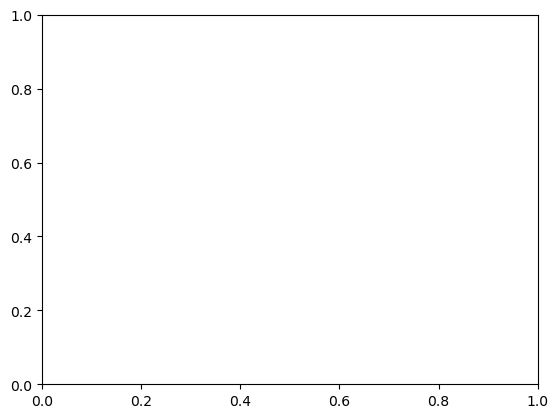

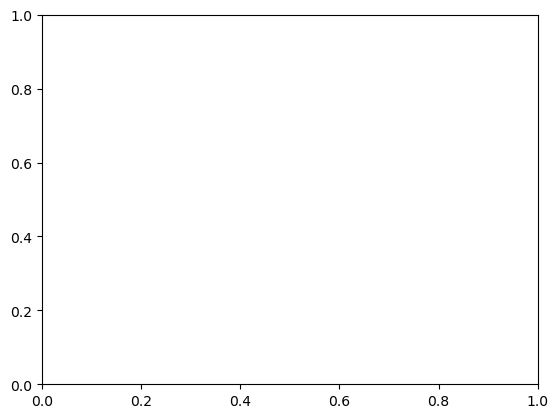

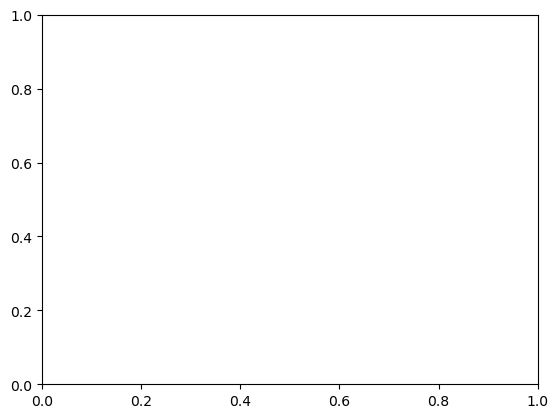

In [23]:
import os
if not os.path.exists("result"):
    os.makedirs("result")
result_path="result"
importance_figs=xgbFunc.visualize_importance(model)
for fig,imp_type in importance_figs:
    fig.savefig(os.path.join(result_path,f"{imp_type}.png"), dpi=300)

In [26]:
model.save_model(os.path.join(result_path,"model_ori.json"))

In [4]:
# shap_fig=xgbFunc.visulize_shap(model, X_train)
# shap_fig.savefig(os.path.join(result_path,"shap.png"), dpi=300)